<a href="https://colab.research.google.com/github/sa-vn/AdvancedStatisticalApproache/blob/main/StatistcsProject_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

This datasat aims to classificate stars, galaxies, and quasars based on their spectral characteristics.The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.In this experiance the five features has been selected.
u = Ultraviolet filter in the photometric system.
g = Green filter in the photometric system.
r = Red filter in the photometric system.
i = Near Infrared filter in the photometric system.
z = Infrared filter in the photometric system.
MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken

In [32]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/sa-vn/AdvancedStatisticalApproache/refs/heads/main/star_classification.csv')
df.head(25)

u         g         r         i         z    MJD   class
0   23.87882  22.27530  20.39501  19.16573  18.79371  56354  GALAXY
1   24.77759  22.83188  22.58444  21.16812  21.61427  58158  GALAXY
2   25.26307  22.66389  20.60976  19.34857  18.94827  55592  GALAXY
3   22.13682  23.77656  21.61162  20.50454  19.25010  58039  GALAXY
4   19.43718  17.58028  16.49747  15.97711  15.54461  56187  GALAXY
5   23.48827  23.33776  21.32195  20.25615  19.54544  55855     QSO
6   21.46973  21.17624  20.92829  20.60826  20.42573  58456     QSO
7   22.24979  22.02172  20.34126  19.48794  18.84999  56210  GALAXY
8   24.40286  22.35669  20.61032  19.46490  18.95852  56386  GALAXY
9   21.74669  20.03493  19.17553  18.81823  18.65422  54082    STAR
10  25.77163  22.52042  20.63884  19.78071  19.05765  55852  GALAXY
11  23.76761  23.79969  20.98318  19.80745  19.45579  55693  GALAXY
12  23.17274  20.14496  19.41948  19.22034  18.89359  56540    STAR
13  20.82940  18.75091  17.51118  17.01631  16.62772  55739  GALAXY
14  23.20911  22.79291  22.08589  21.86282  21.85120  57682  GALAXY
15  24.88680  22.13311  20.44728  19.49171  18.97470  55693  GALAXY
16  24.54890  21.44267  20.95315  20.79360  20.48442  55864    STAR
17  20.38562  20.40514  20.29996  20.05918  19.89044  57663     QSO
18  21.82154  20.55730  19.94918  19.76057  19.55514  57373    STAR
19  20.48292  18.67807  17.61680  17.11936  16.73351  51929  GALAXY
20  22.13367  20.84772  18.96537  18.31696  17.98124  51942  GALAXY
21  24.54793  22.33601  20.92259  19.87177  19.16934  56710    STAR
22  25.44243  20.77028  19.66170  19.08481  18.83176  52316  GALAXY
23  21.73992  21.53095  21.26763  21.36257  21.15861  56709     QSO
24  18.88323  17.54229  17.01789  16.75376  16.72259  52824  GALAXY

**PreProcessing to remove the excessive outlieres**

In [33]:
from scipy import stats

# Remove rows where any feature has extreme outliers
df = df[(np.abs(stats.zscore(df[['u', 'g', 'r', 'i', 'z', 'MJD']])) < 3).all(axis=1)]


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99715 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   u       99715 non-null  float64
 1   g       99715 non-null  float64
 2   r       99715 non-null  float64
 3   i       99715 non-null  float64
 4   z       99715 non-null  float64
 5   MJD     99715 non-null  int64  
 6   class   99715 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 6.1+ MB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


**Exploratory Data Analysis**

sns.pairplot is a function in the seaborn library in Python that is used to plot pairwise relationships between multiple variables in a dataset. The resulting plot is a grid of scatterplots, with each variable plotted against every other variable.


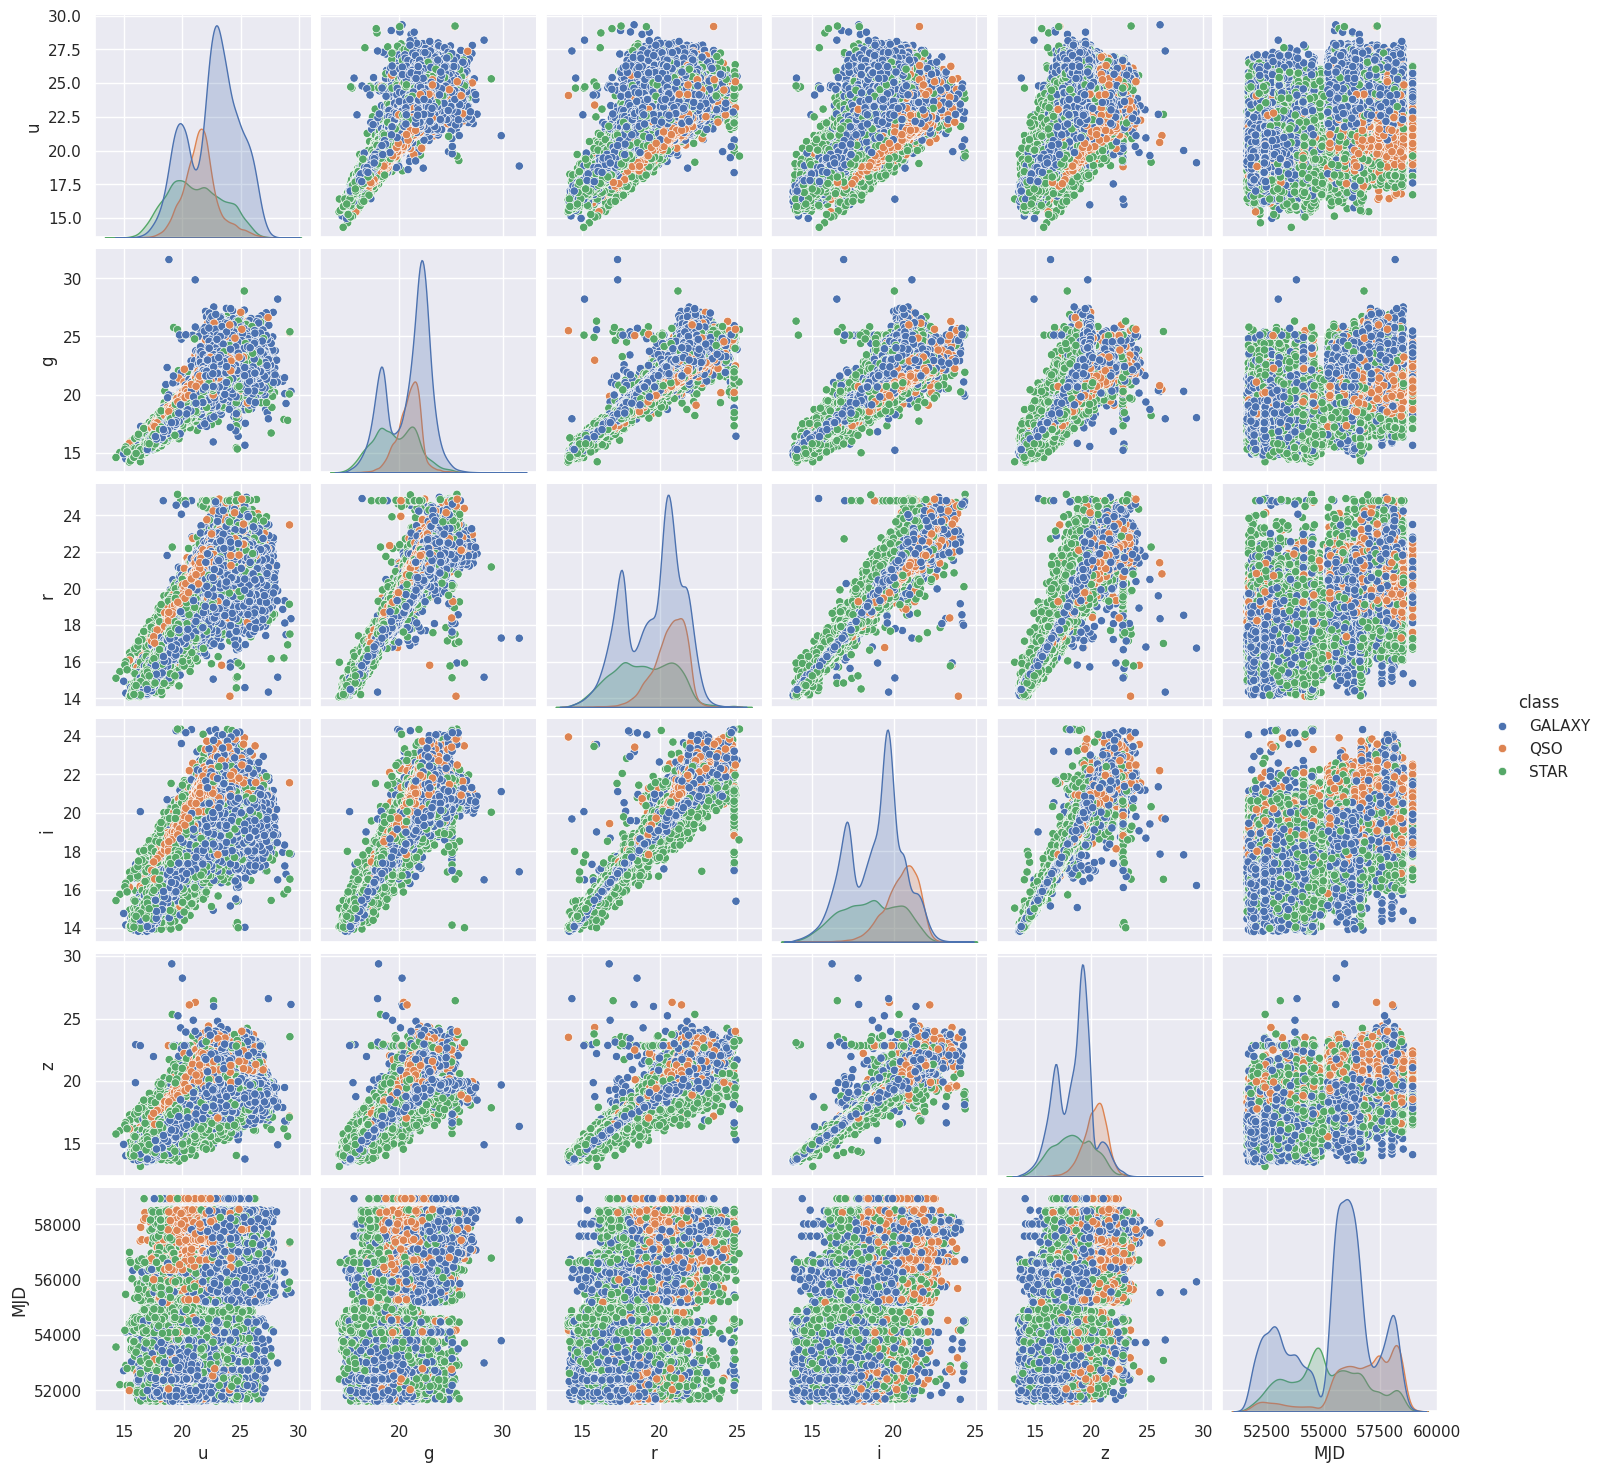

In [ ]:
sns.pairplot(df, hue='class')
plt.show()

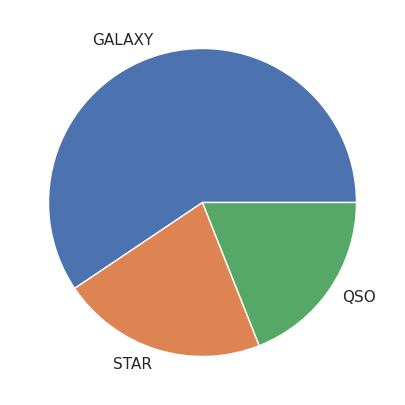

In [ ]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [ ]:
X = df.drop(columns=['class'])
X.head(10)

u         g         r         i         z    MJD
0  23.87882  22.27530  20.39501  19.16573  18.79371  56354
1  24.77759  22.83188  22.58444  21.16812  21.61427  58158
2  25.26307  22.66389  20.60976  19.34857  18.94827  55592
3  22.13682  23.77656  21.61162  20.50454  19.25010  58039
4  19.43718  17.58028  16.49747  15.97711  15.54461  56187
5  23.48827  23.33776  21.32195  20.25615  19.54544  55855
6  21.46973  21.17624  20.92829  20.60826  20.42573  58456
7  22.24979  22.02172  20.34126  19.48794  18.84999  56210
8  24.40286  22.35669  20.61032  19.46490  18.95852  56386
9  21.74669  20.03493  19.17553  18.81823  18.65422  54082

In [ ]:
X.describe().transpose()

count          mean          std          min           25%  \
u    99715.0     22.092616     2.235973     14.31105     20.363380   
g    99715.0     20.642952     2.017030     14.21384     18.980265   
r    99715.0     19.655766     1.831208     14.08235     18.151995   
i    99715.0     19.092210     1.731249     13.82009     17.747225   
z    99715.0     18.778773     1.745094     13.14744     17.474270   
MJD  99715.0  55593.325127  1807.104553  51608.00000  54242.000000   

             50%           75%          max  
u       22.18586     23.690265     29.32565  
g       21.10459     22.124845     31.60224  
r       20.12909     21.045390     25.15160  
i       19.40774     20.396020     24.35730  
z       19.00706     19.921770     29.38374  
MJD  55882.00000  56780.000000  58932.00000

**Standardize the Data**

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

u         g         r         i         z       MJD
0  0.798853  0.809287  0.403694  0.042467  0.008559  0.420938
1  1.200814  1.085229  1.599321  1.199089  1.624847  1.419225
2  1.417937  1.001943  0.520967  0.148079  0.097128 -0.000733
3  0.019770  1.553583  1.068073  0.815791  0.270088  1.353373
4 -1.187603 -1.518414 -1.724715 -1.799345 -1.853298  0.328524
5  0.624185  1.336034  0.909887  0.672316  0.439329  0.144804
6 -0.278576  0.264394  0.694913  0.875702  0.943769  1.584130
7  0.070294  0.683567  0.374342  0.228582  0.040810  0.341252
8  1.033222  0.849639  0.521273  0.215274  0.103002  0.438646
9 -0.154710 -0.301446 -0.262252 -0.158256 -0.071374 -0.836328

In [ ]:
X.describe().transpose()

count          mean       std       min       25%       50%       75%  \
u    99715.0 -1.402452e-15  1.000005 -3.480187 -0.773374  0.041702  0.714524   
g    99715.0  3.151000e-16  1.000005 -3.187431 -0.824328  0.228871  0.734694   
r    99715.0  2.642223e-16  1.000005 -3.043589 -0.821195  0.258478  0.758860   
i    99715.0 -1.345909e-15  1.000005 -3.045284 -0.776891  0.182257  0.753108   
z    99715.0 -7.263262e-16  1.000005 -3.226968 -0.747530  0.130817  0.654981   
MJD  99715.0 -5.181479e-16  1.000005 -2.205376 -0.747788  0.159745  0.656675   

          max  
u    3.234864  
g    5.433406  
r    3.001222  
i    3.041224  
z    6.077049  
MJD  1.847536

Observations and variables


In [ ]:
observations = list(df.index)
variables = list(df.columns)
variables.remove('class')
print(observations)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

Box and Whisker Plots


<ipython-input-57-73faf6042fe0>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


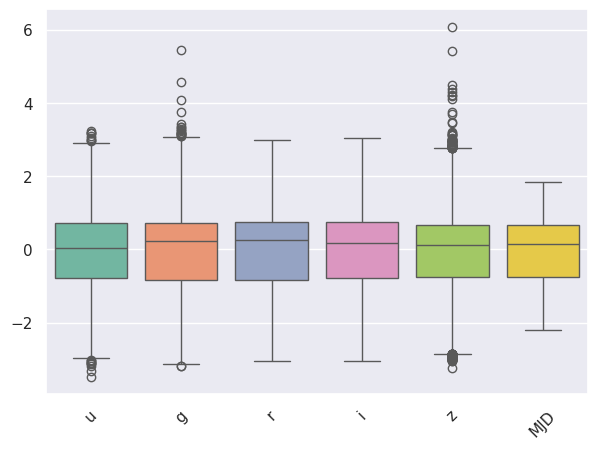

In [ ]:
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

<ipython-input-58-fd037a194353>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


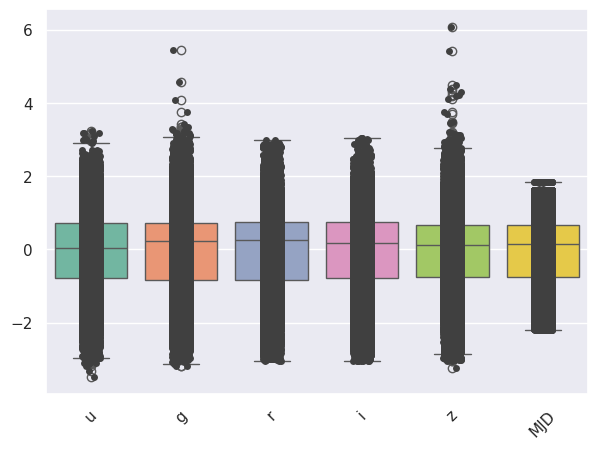

In [ ]:
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix **

the correlation matrix for the numerical features (u, g, r, i, z, MJD) in the dataset. It shows high positive correlations between r, i, and z. Features u and g also show moderately high correlations with other features. Moreover, MJD has lower correlations with all other features.  suggesting it may contribute unique information to the dataset






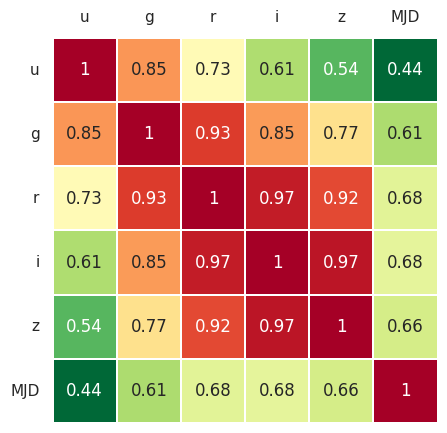

In [ ]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.2, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);


**Implimenting Principal Component Analysis (PCA) **

Text(0, 0.5, '$Z_2$')

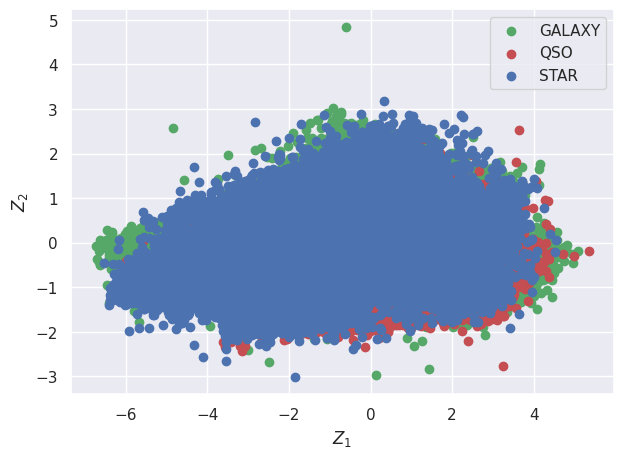

In [ ]:
pca = PCA()
X = X.dropna()
Z = pca.fit_transform(X)

idx_Glaxy= np.where(y == 'GALAXY')
idx_QSO = np.where(y == 'QSO')
idx_STAR = np.where(y == 'STAR')

plt.scatter(Z[idx_Glaxy,0], Z[idx_Glaxy,1], c='g', label='GALAXY')
plt.scatter(Z[idx_QSO,0], Z[idx_QSO,1], c='r', label='QSO')
plt.scatter(Z[idx_STAR,0], Z[idx_STAR,1], c='b', label='STAR')

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

The code plots the featur weights for PC1 and PC2 as a scatter plot.
in plot Each point represents a feature, and its position shows how much the feature contributes to PC1 and PC2. This is useful for understanding which features are most influential in the reduced dimensional space.
And then the matrix of eigenvectors is plot.


array([[ 0.35409416,  0.71562088,  0.27802409, -0.52752096, -0.08323153,
        -0.00091297],
       [ 0.430503  ,  0.31594289,  0.0474241 ,  0.66638337,  0.48072073,
         0.19349161],
       [ 0.44999897, -0.00140343, -0.18117495,  0.2896745 , -0.53185122,
        -0.63079121],
       [ 0.43891036, -0.19960825, -0.31789156, -0.08156222, -0.40163337,
         0.70604351],
       [ 0.42032997, -0.30420923, -0.40163584, -0.43071641,  0.56373145,
        -0.25721265],
       [ 0.34273289, -0.50564629,  0.79073561, -0.03968004,  0.00344413,
        -0.00261332]])

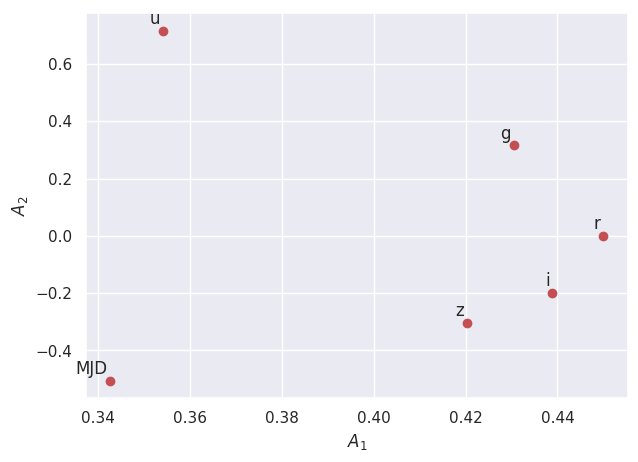

In [ ]:
A = pca.components_.T
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


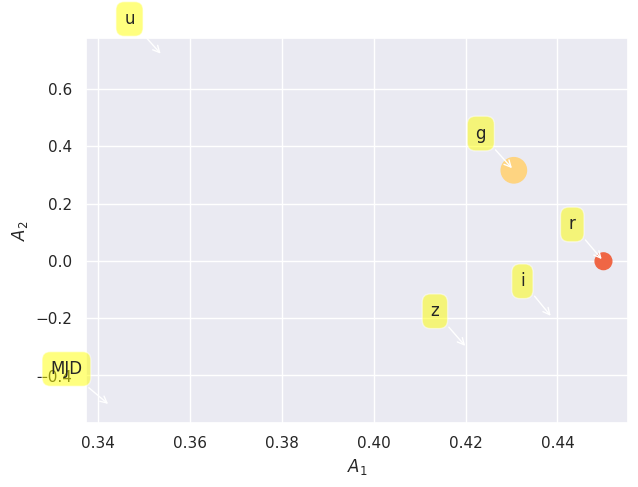

In [ ]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot and Expalind variance **

array([4.78136215, 0.66679165, 0.42819277, 0.09269569, 0.02075968,
       0.01025823])

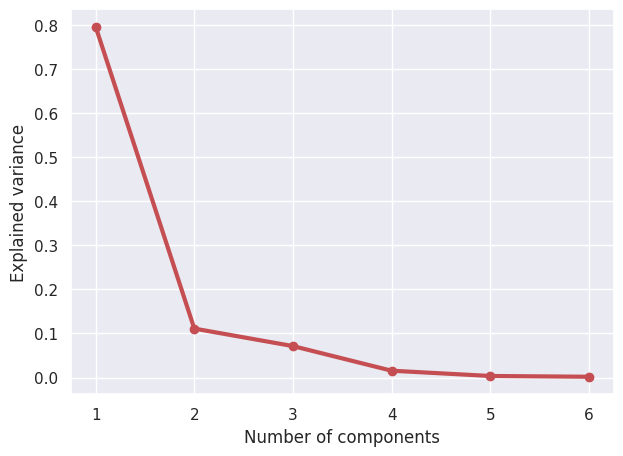

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**PARETO PLOT  and Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

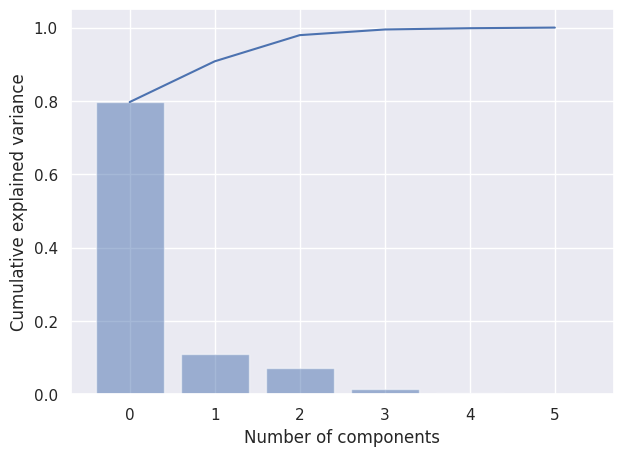

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

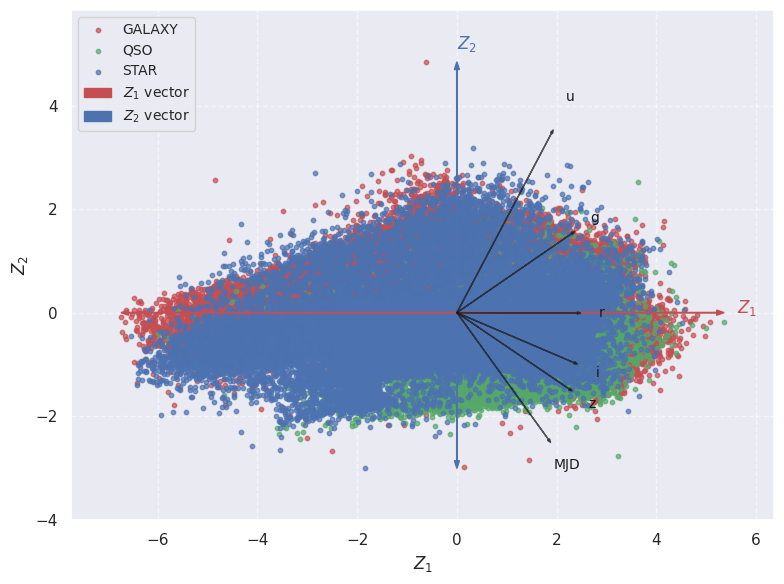

In [ ]:
plt.figure(figsize=(8, 6))  # Set figure size
plt.xlabel('$Z_1$', fontsize=12)
plt.ylabel('$Z_2$', fontsize=12)

# Plot the scatter points categorized by class
plt.scatter(Z[idx_Glaxy, 0], Z[idx_Glaxy, 1], c='r', label='GALAXY', s=10, alpha=0.7)
plt.scatter(Z[idx_QSO, 0], Z[idx_QSO, 1], c='g', label='QSO', s=10, alpha=0.7)
plt.scatter(Z[idx_STAR, 0], Z[idx_STAR, 1], c='b', label='STAR', s=10, alpha=0.7)

# Extend Z1 vector in both positive and negative directions
plt.arrow(0, 0, max(Z[:, 0]), 0, color='r', width=0.01, head_width=0.1,
          length_includes_head=True, label='$Z_1$ vector')
plt.arrow(0, 0, min(Z[:, 0]), 0, color='r', width=0.01, head_width=0.1,
          length_includes_head=True, label='')

# Extend Z2 vector in both positive and negative directions
plt.arrow(0, 0, 0, max(Z[:, 1]), color='b', width=0.01, head_width=0.1,
          length_includes_head=True, label='$Z_2$ vector')
plt.arrow(0, 0, 0, min(Z[:, 1]), color='b', width=0.01, head_width=0.1,
          length_includes_head=True, label='')

# Plot the original feature vectors as arrows
for i in range(len(A1)):
    plt.arrow(0, 0, A1[i]*max(Z[:,0]), A2[i]*max(Z[:,1]), color='k',
              width=0.002, head_width=0.05, alpha=0.7, zorder=3)  # Feature vector arrows
    plt.text(A1[i]*max(Z[:,0])*1.2, A2[i]*max(Z[:,1])*1.2, variables[i],
             color='k', fontsize=10, ha='center', va='center', zorder=4)  # Feature labels

# Add labels for Z1 and Z2
plt.text(max(Z[:, 0])*1.05, 0, '$Z_1$', color='r', fontsize=12)
plt.text(min(Z[:, 0])*1.1, 0, '', color='r', fontsize=12)
plt.text(0, max(Z[:, 1])*1.05, '$Z_2$', color='b', fontsize=12)
plt.text(0, min(Z[:, 1])*1.1, '', color='b', fontsize=12)

# Add legend and grid
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust axes limits for better visualization
plt.xlim(min(Z[:, 0]) - 1, max(Z[:, 0]) + 1)
plt.ylim(min(Z[:, 1]) - 1, max(Z[:, 1]) + 1)

# Show the plot
plt.tight_layout()
plt.show()


# **Using PCA Library**

In [ ]:
!pip install pca

In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


Principal Components

In [ ]:
out['PC']

PC1       PC2       PC3
0      0.979438  0.602871  0.503254
1      3.307768 -0.251314  0.184019
2      1.273425  1.271797  0.260688
3      2.091885 -0.425838  0.588016
4     -3.306478 -0.570348  1.486407
...         ...       ...       ...
99710  2.503603 -0.811809 -0.071793
99711  1.238330 -0.098774  0.354809
99712 -1.695710  0.196946  0.119146
99713  0.896478  1.010593  0.780949
99714  1.202519 -0.266531  0.376448

[99715 rows x 3 columns]

Scatter plot

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.48%] of the variance'}, xlabel='PC1 (79.6% expl.var)', ylabel='PC2 (11.1% expl.var)'>)

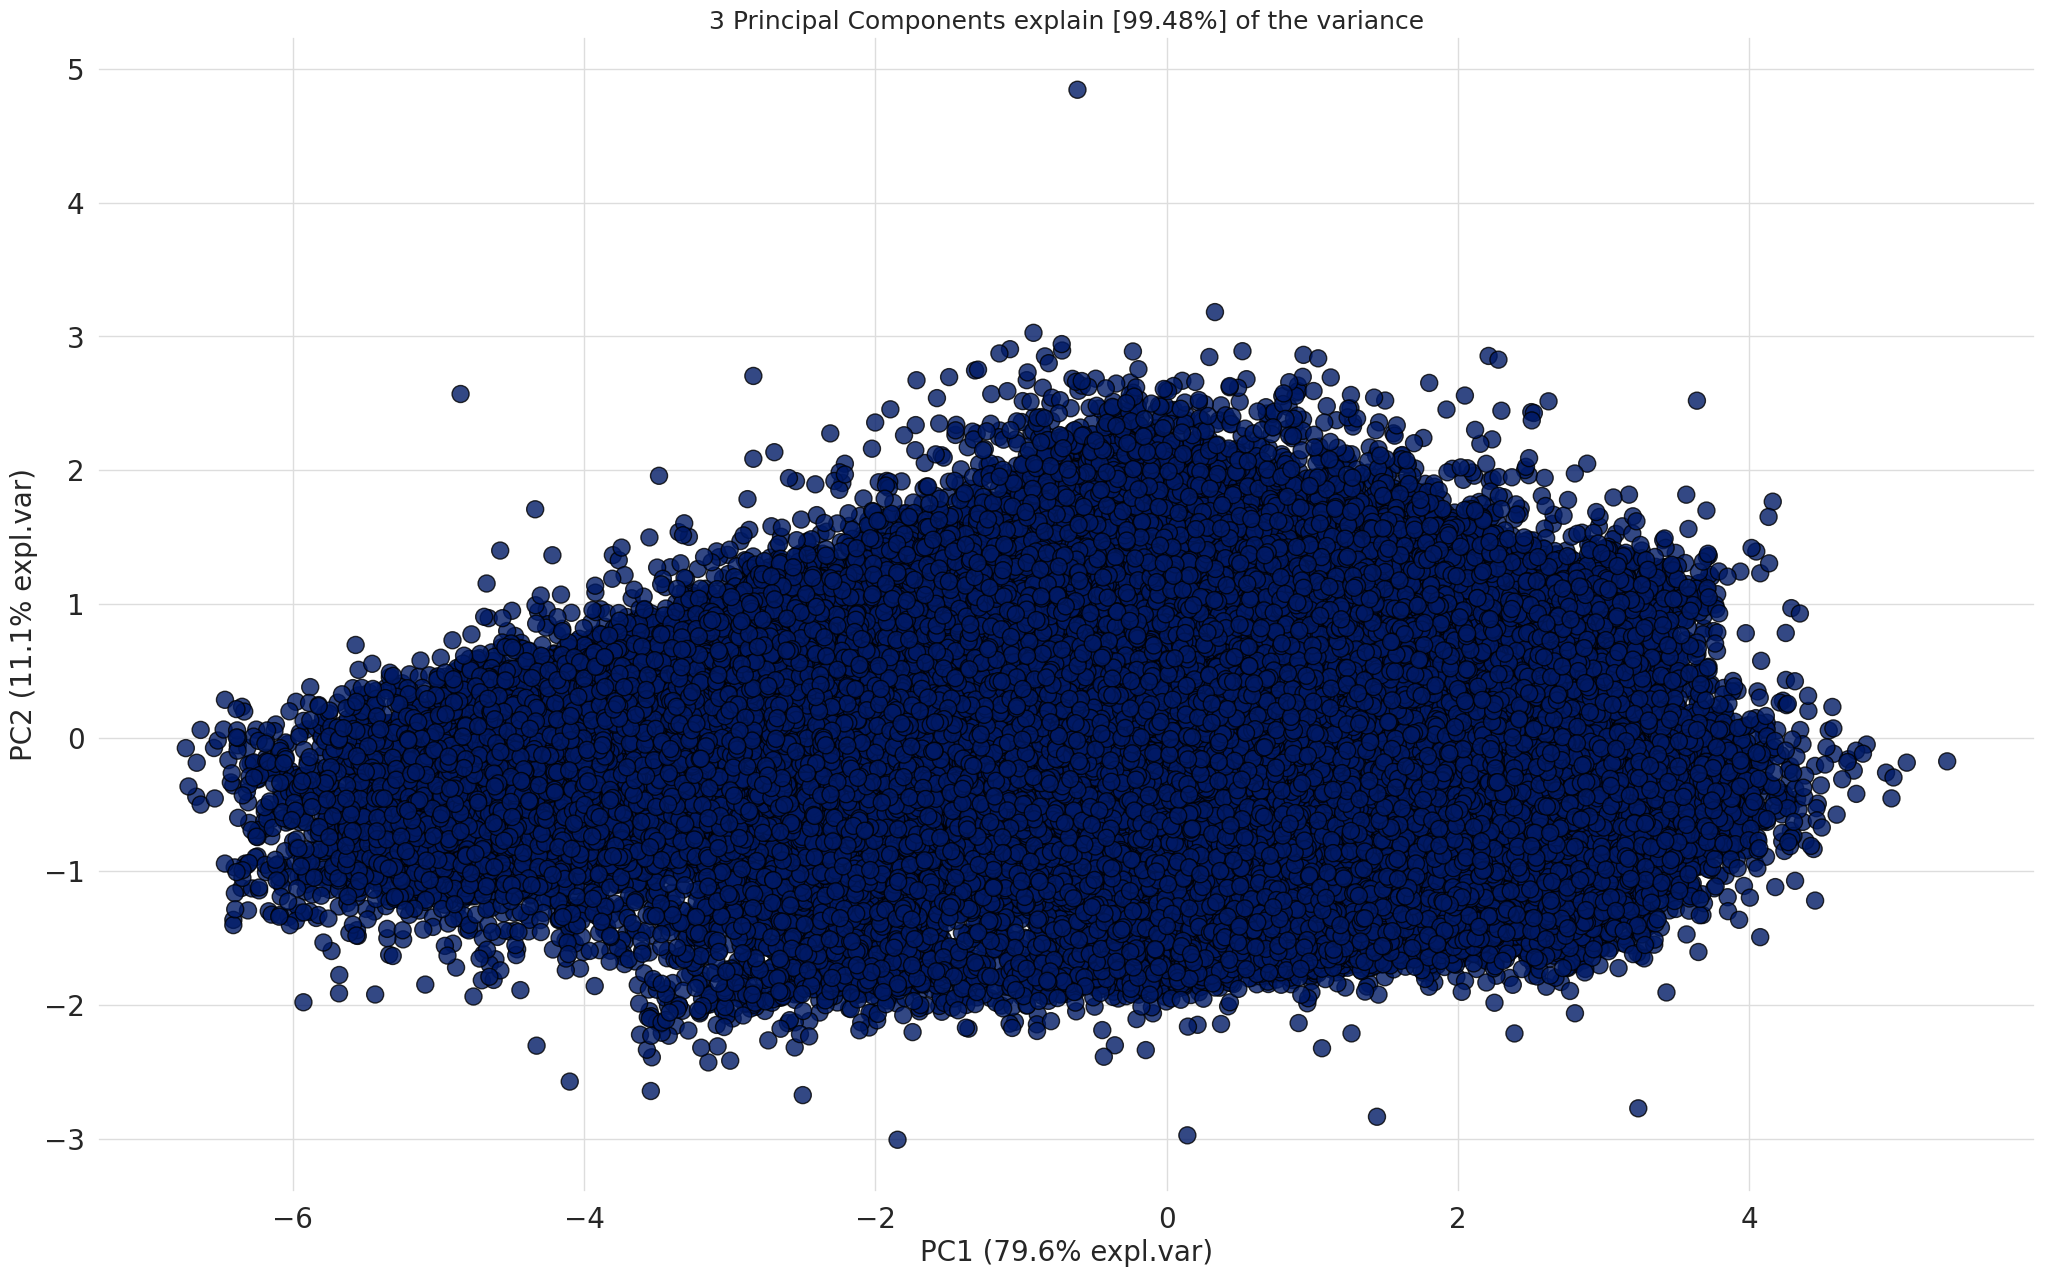

In [ ]:
model.scatter(label=True, legend=False)

Eigenvectors

In [ ]:
A = out['loadings'].T
A

PC1       PC2       PC3
u    0.354094  0.715621  0.278024
g    0.430503  0.315943  0.047424
r    0.449999 -0.001403 -0.181175
i    0.438910 -0.199608 -0.317892
z    0.420330 -0.304209 -0.401636
MJD  0.342733 -0.505646  0.790736

<ipython-input-20-da59a7d9feff>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],


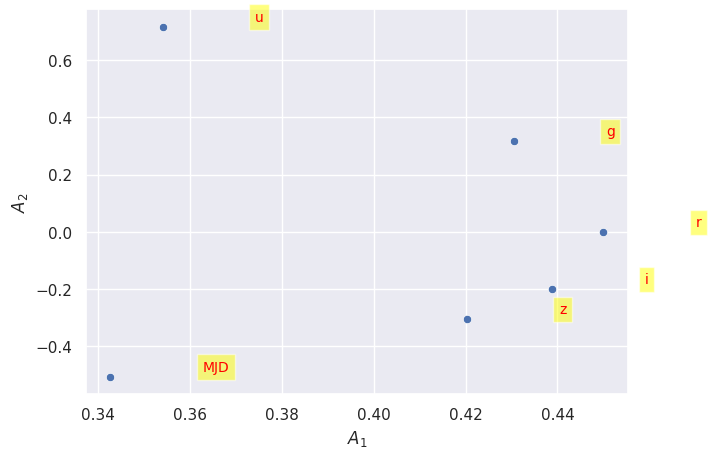

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

Scree Plot

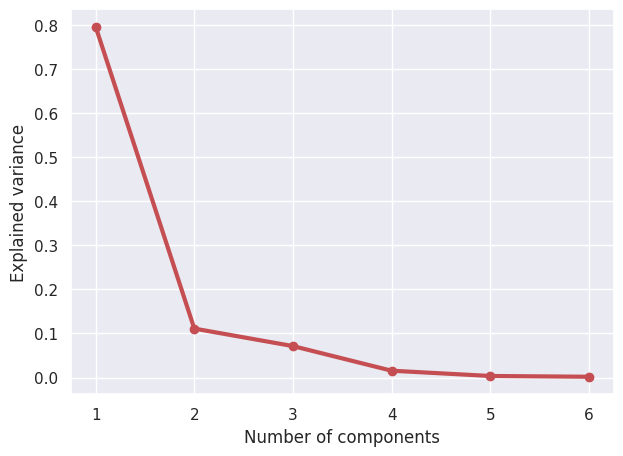

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

Explained Variance Plot

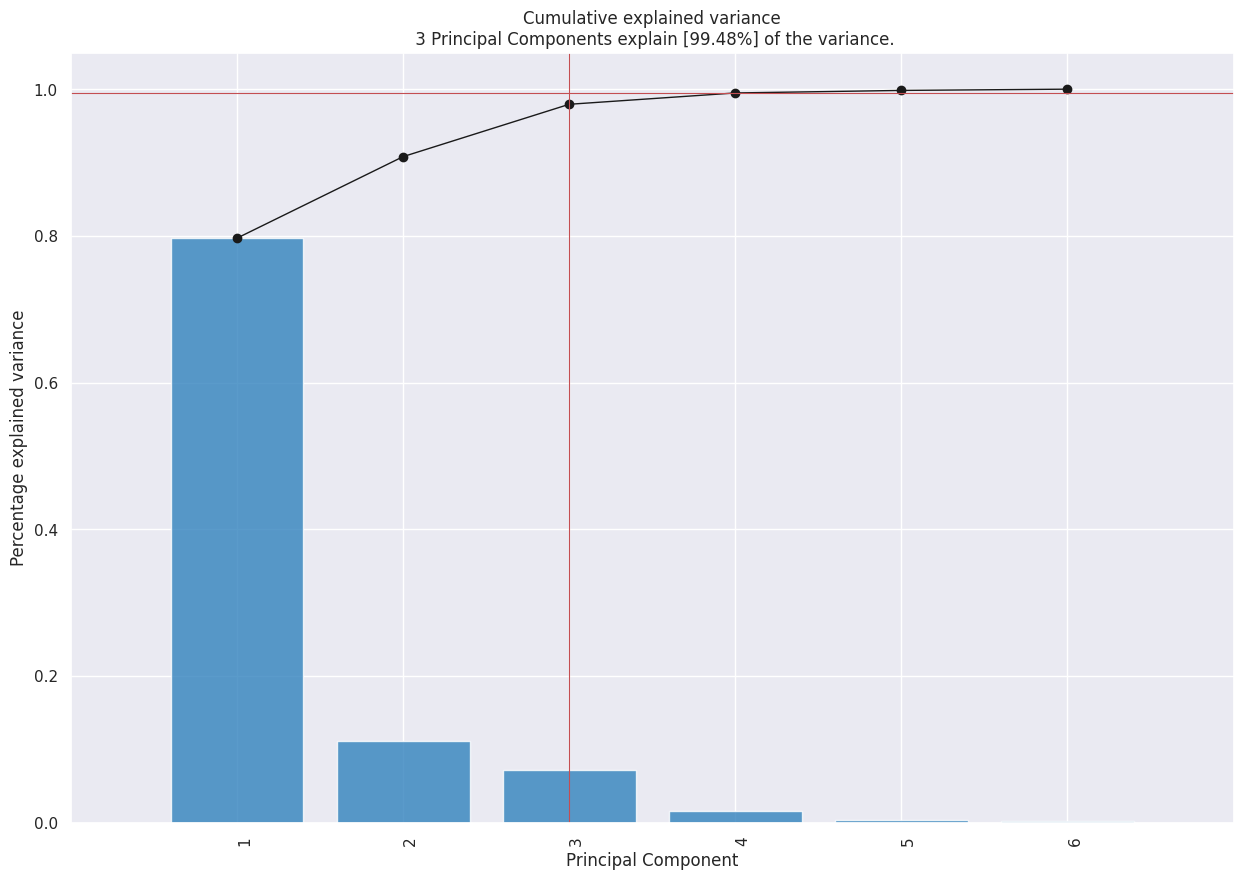

In [ ]:
model.plot();

Biplot

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.48%] of the variance'}, xlabel='PC1 (79.6% expl.var)', ylabel='PC2 (11.1% expl.var)'>)

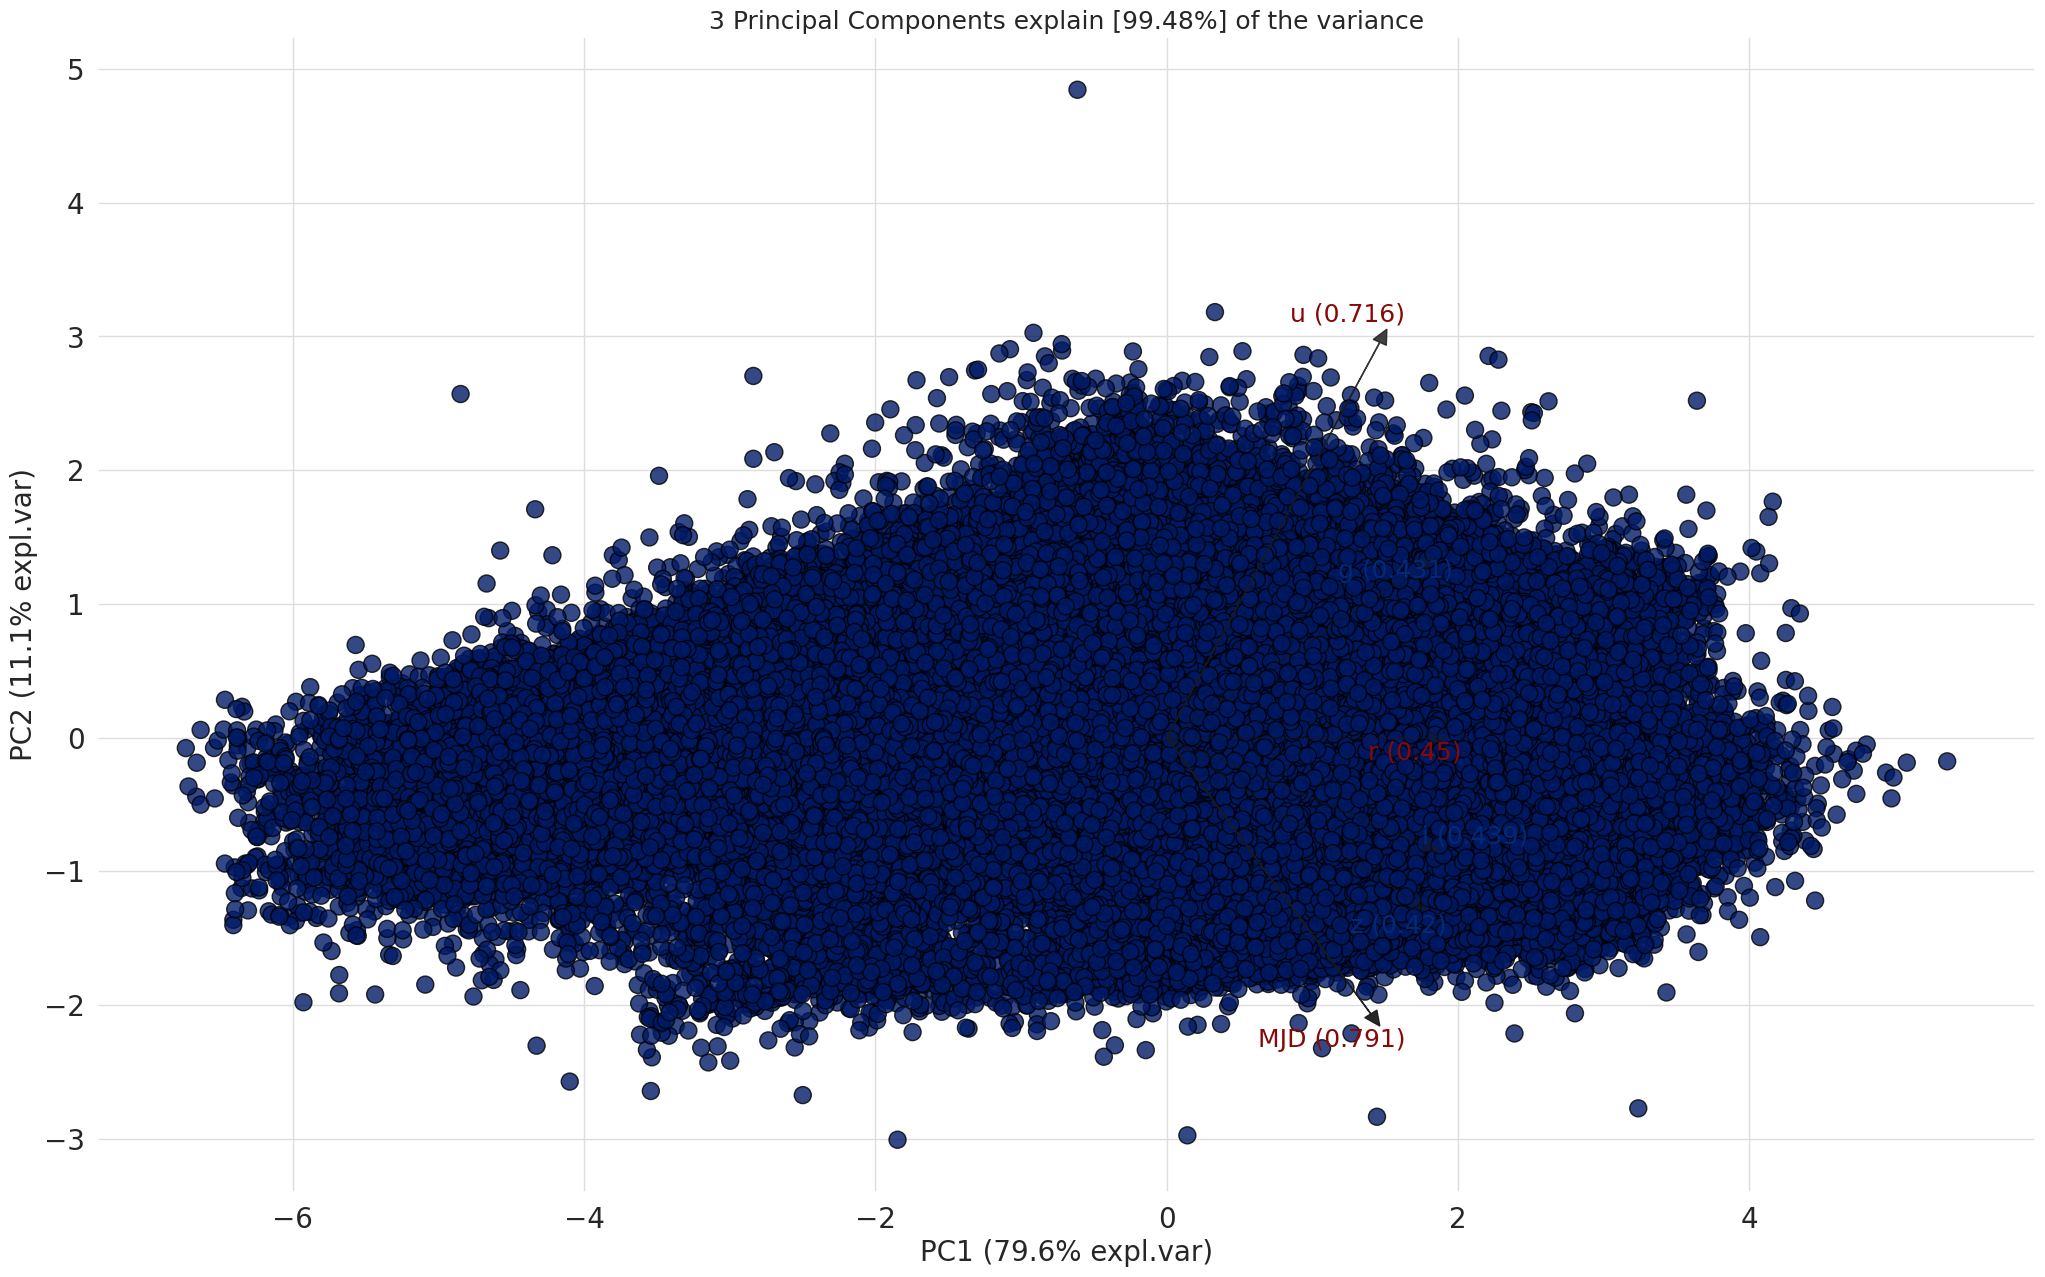

In [ ]:
model.biplot(label=False, legend=False, color_arrow='k')

Install Pycaret

In [ ]:
# install slim version (default)
!pip install pycaret

In [ ]:
from pycaret.utils import version
version()

'3.3.2'

In [ ]:
!pip install pycaret[analysis]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 23.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.8/287.8 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

**Data Splitting**

In [ ]:
data = df.sample(frac=0.9, random_state=9999)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (89744, 7)
Unseen Data For Predictions: (9971, 7)


Setting up the Environment in PyCaret

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline.

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

**Comparing all Machine Learning Models before PCA**

In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123, use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [ ]:
 best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=49, p=2,
                     weights='uniform')

**Pycaret model After PCA**

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Assuming 'target_column' contains the class labels
classes = np.unique(data['class'])
class_weights = compute_class_weight(
    class_weight='balanced',  # Use 'balanced' strategy for automatic computation
    classes=classes,         # Unique classes in the dataset
    y=data['class']  # Target column with class labels
)

# Convert class weights into a dictionary
custom_weights = dict(zip(classes, class_weights))

print("Computed Class Weights:", custom_weights)


Computed Class Weights: {'GALAXY': 0.5609035056469103, 'QSO': 1.7553495286155771, 'STAR': 1.5444610804206034}


In [ ]:
from pycaret.classification import *

clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 2 ,fix_imbalance_method=True, fold=10, use_gpu=True)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [ ]:
 best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

**Tune Three Best Classifiers**

In [ ]:
from pycaret.classification import *
gbc = create_model('gbc')
tuned_gbc = tune_model(gbc, optimize='Accuracy')


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
from pycaret.classification import *
# Tune LightGBM
lightgbm = create_model('lightgbm')
tuned_lightgbm = tune_model(lightgbm, optimize='Accuracy')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
# Tune XGBoost
from pycaret.classification import *
xgboost = create_model('xgboost')
tuned_xgboost = tune_model(xgboost, optimize='Accuracy')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Get the best hyperparameters values**

In [ ]:
# Retrieve best hyperparameters for Gradient Boosting Classifier
#print("Best Hyperparameters for Gradient Boosting Classifier:")
#print(tuned_gbc.get_params())

# Retrieve best hyperparameters for LightGBM
print("\nBest Hyperparameters for LightGBM:")
print(tuned_lightgbm.get_params())

# Retrieve best hyperparameters for XGBoost
print("\nBest Hyperparameters for XGBoost:")
print(tuned_xgboost.get_params())



Best Hyperparameters for LightGBM:
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.05, 'max_depth': -1, 'min_child_samples': 96, 'min_child_weight': 0.001, 'min_split_gain': 0.7, 'n_estimators': 180, 'n_jobs': -1, 'num_leaves': 10, 'objective': None, 'random_state': 123, 'reg_alpha': 0.0001, 'reg_lambda': 0.1, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'feature_fraction': 0.9, 'bagging_freq': 4, 'bagging_fraction': 0.6}

Best Hyperparameters for XGBoost:
{'objective': 'multi:softprob', 'base_score': None, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 1, 'device': 'gpu', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.0005, 'max_bin': None, 'max_cat_threshold

**Code to Plot Decision Boundaries:**



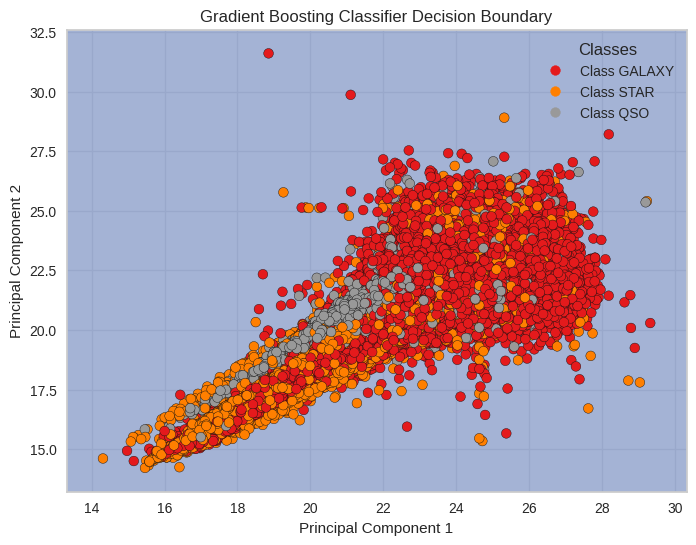

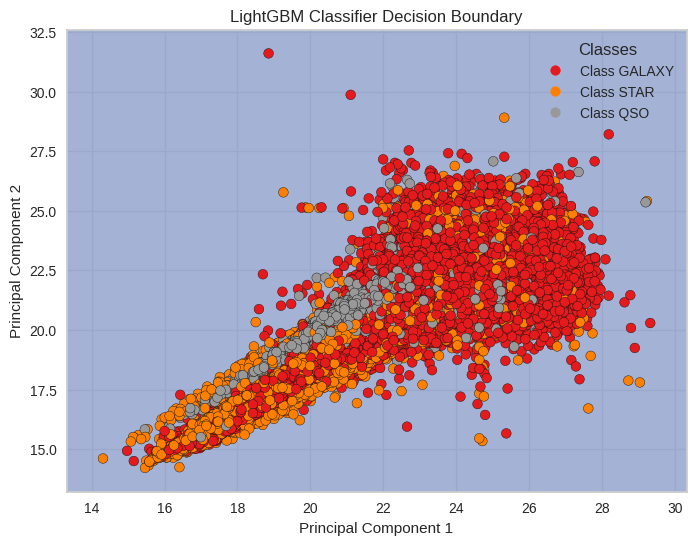

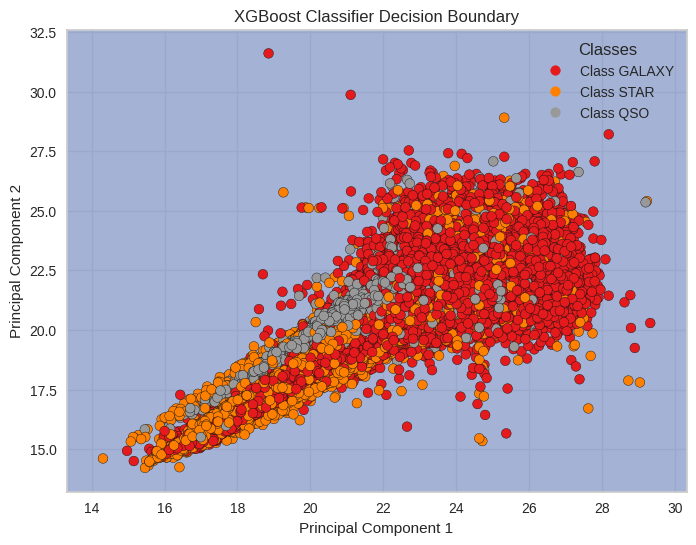

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pycaret.classification import *



# Extract PCA-transformed data
X_transformed = get_config('X')  # Transformed features
y_transformed = get_config('y')  # Target column (categorical)

# Map target labels to numeric values for plotting
def map_labels_to_colors(labels):
    label_mapping = {label: idx for idx, label in enumerate(labels.unique())}
    return labels.map(label_mapping), label_mapping

y_numeric, label_mapping = map_labels_to_colors(y_transformed)

# Function to plot decision boundaries for 3 classes
def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Predict for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundaries
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Set2)
    scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', cmap=plt.cm.Set1)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    # Add legend for class labels
    handles, labels = scatter.legend_elements()
    legend_labels = [f'Class {key}' for key in label_mapping.keys()]
    plt.legend(handles, legend_labels, loc="upper right", title="Classes")
    plt.show()

# Plot decision boundaries for 3 classifiers
plot_decision_boundaries(X_transformed, y_numeric, gbc, "Gradient Boosting Classifier Decision Boundary")
plot_decision_boundaries(X_transformed, y_numeric, lightgbm, "LightGBM Classifier Decision Boundary")
plot_decision_boundaries(X_transformed, y_numeric, xgboost, "XGBoost Classifier Decision Boundary")


**Explainable AI with Shapley values**


**A summary plot ** is a visualization in Explainable AI that combines feature importance with feature effects to provide insights into a model’s behavior. It ranks features by their global importance based on Shapley values and shows how each feature contributes to the model's predictions across all data points. Each dot in the plot represents a single instance, colored by the feature's value (e.g., low to high). This enables quick identification of key features and their impact direction (positive or negative) on predictions, making it a powerful tool for understanding complex machine learning models.

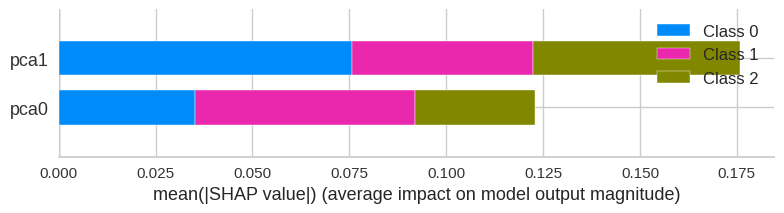

In [ ]:
interpret_model(tuned_xgboost, plot='summary')

**Plot the ROC for tuned xgboost model**

```
# This is formatted as code
```



Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


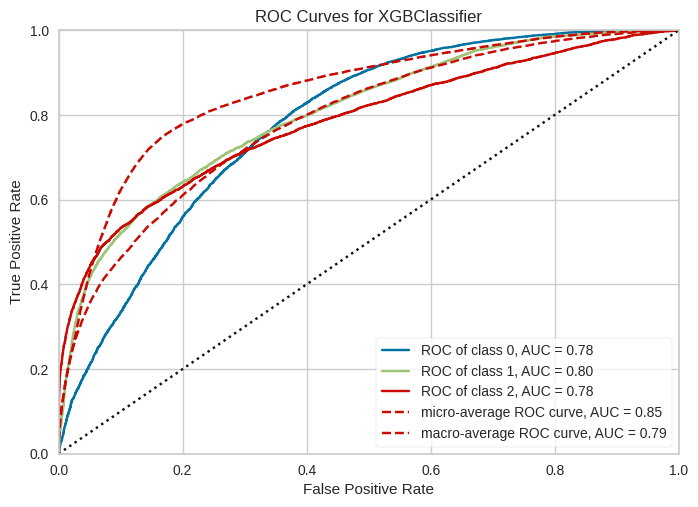

In [27]:
from pycaret.classification import *

tuned_xgboost = tune_model(xgboost, optimize='AUC')  # Tune XGBoost for best AUC

# Plot the ROC curve
plot_model(tuned_xgboost, plot='auc')
